In [2]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import regexp_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.dummy import DummyClassifier
from tokenizers import Tokenizer, models, trainers, pre_tokenizers
from wordcloud import WordCloud

nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/nicolas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/nicolas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nicolas/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/nicolas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nicolas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
combined = pd.read_csv("./assets/combined.csv")

combined.dropna(subset=['tweet', 'Status'], inplace=True)

combined['tweet_length'] = combined['tweet'].str.len()

X = combined[['tweet_length']]
y = combined['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

y_dummy_pred = dummy.predict(X_test)

accuracy = accuracy_score(y_test, y_dummy_pred)
report = classification_report(y_test, y_dummy_pred)

print("Naives Modell - Accuracy:", accuracy)
print("\nNaives Modell - Classification Report:\n", report)


Naives Modell - Accuracy: 0.5280133795245491

Naives Modell - Classification Report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.69      4420
           1       0.00      0.00      0.00      3951

    accuracy                           0.53      8371
   macro avg       0.26      0.50      0.35      8371
weighted avg       0.28      0.53      0.36      8371



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

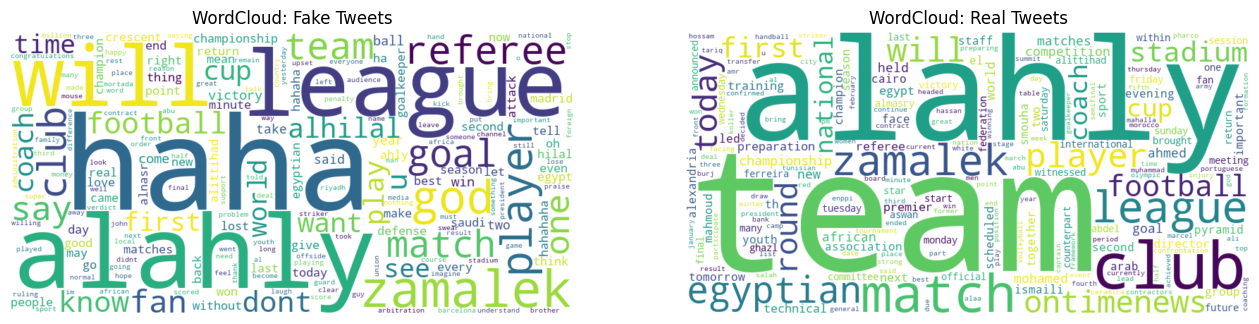

In [4]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'[^a-z\s]', '', text)  
    return text

fake_df = pd.read_csv("./assets/fake.csv")
real_df = pd.read_csv("./assets/real.csv")

fake_df.dropna(subset=["tweet"], inplace=True)
real_df.dropna(subset=["tweet"], inplace=True)

fake_text = clean_text(" ".join(fake_df["tweet"].tolist()))
real_text = clean_text(" ".join(real_df["tweet"].tolist()))

fake_wc = WordCloud(width=800, height=400,
                    background_color="white",
                    collocations=False).generate(fake_text)

real_wc = WordCloud(width=800, height=400,
                    background_color="white",
                    collocations=False).generate(real_text)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(fake_wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud: Fake Tweets")

plt.subplot(1, 2, 2)
plt.imshow(real_wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud: Real Tweets")

plt.show()


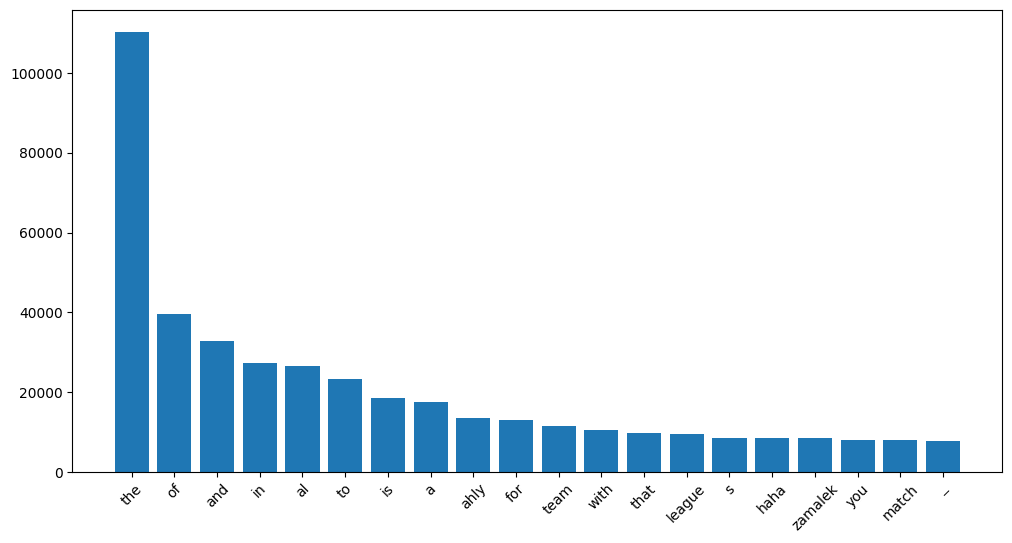

In [5]:
df = pd.read_csv("./assets/combined.csv")
df.dropna(subset=["tweet"], inplace=True)

text = " ".join(df["tweet"].tolist())
words = re.findall(r'\b\w+\b', text.lower())
common_words = Counter(words).most_common(20)
labels, counts = zip(*common_words)

plt.figure(figsize=(12,6))
plt.bar(labels, counts)
plt.xticks(rotation=45)
plt.show()

In [6]:
def top_down_tokenize(text):
    rough_tokens = text.split()
    pattern = r'[A-Za-z]+'
    final_tokens = []
    for token in rough_tokens:
        token = token.lower()
        tokens = regexp_tokenize(token, pattern)
        final_tokens.extend(tokens)
    return final_tokens

df = pd.read_csv("./assets/combined.csv")
df.dropna(subset=["tweet"], inplace=True)
df["tokens"] = df["tweet"].apply(top_down_tokenize)

for index, row in df.head(5).iterrows():
    print(f"Tweet {index}: {row['tokens']}")


Tweet 0: ['sun', 'downs', 'technical', 'director', 'al', 'ahly', 'respected', 'us', 'and', 'played', 'to', 'win']
Tweet 1: ['shawky', 'gharib', 'after', 'the', 'tie', 'with', 'enppi', 'our', 'goal', 'is', 'to', 'return', 'to', 'the', 'golden', 'square']
Tweet 2: ['egyptian', 'sports', 'news', 'today', 'wednesday', 'which', 'is', 'many', 'important', 'sports', 'news', 'including', 'the', 'appointment', 'of', 'baba', 'vassiliou', 'as', 'technical', 'director', 'of', 'the', 'national', 'bank']
Tweet 3: ['the', 'main', 'referees', 'committee', 'of', 'the', 'egyptian', 'football', 'association', 'conducted', 'physical', 'fitness', 'tests', 'for', 'the', 'failed', 'and', 'late', 'referees', 'from', 'the', 'tests', 'that', 'took', 'place', 'at', 'the', 'beginning', 'of', 'the', 'season', 'at', 'the', 'tarsana', 'club', 'stadium']
Tweet 4: ['haji', 'bari', 'the', 'striker', 'of', 'the', 'future', 'team', 'is', 'undergoing', 'a', 'final', 'test', 'on', 'the', 'sidelines', 'of', 'the', 'closing'

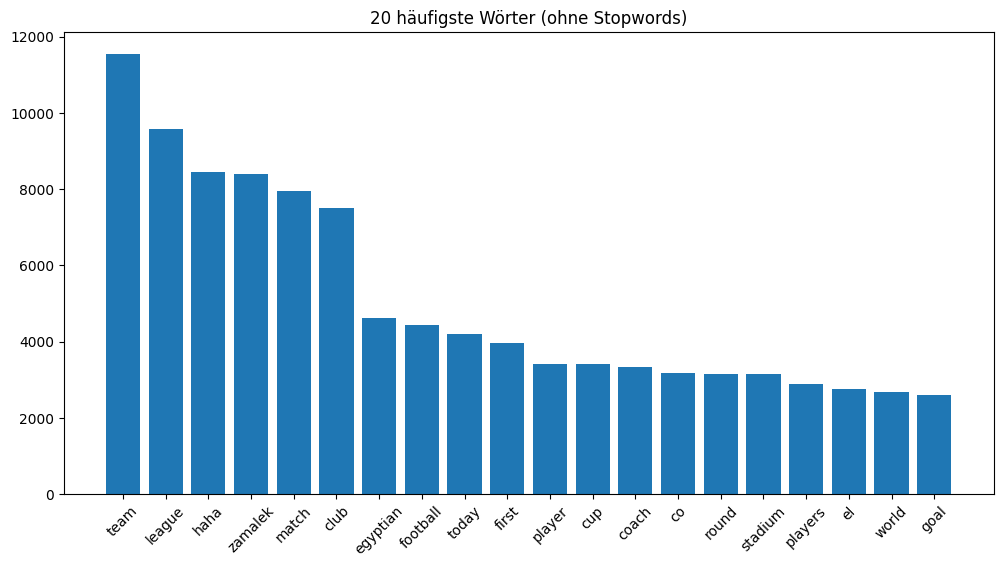

In [7]:
stop_words = set(stopwords.words('english'))

additional_stopwords = {"al", "god", "https", "ahly"}
stop_words = stop_words.union(additional_stopwords)

df = pd.read_csv("./assets/combined.csv")
df.dropna(subset=["tweet"], inplace=True)

text = " ".join(df["tweet"].tolist())

words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
filtered_words = [word for word in words if word not in stop_words]
common_words = Counter(filtered_words).most_common(20)

labels, counts = zip(*common_words)

plt.figure(figsize=(12,6))
plt.bar(labels, counts)
plt.xticks(rotation=45)
plt.title("20 häufigste Wörter (ohne Stopwords)")
plt.show()

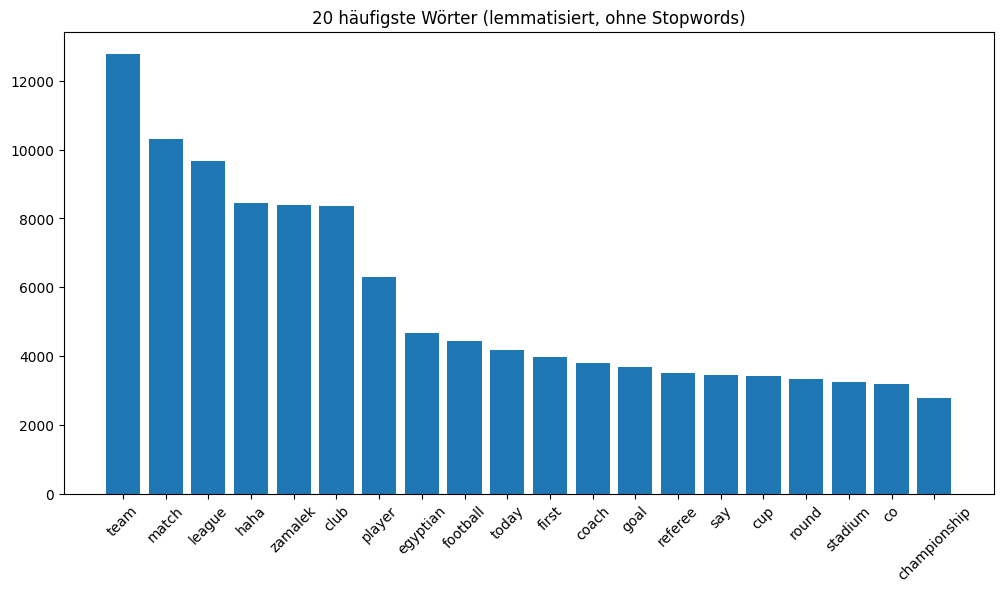

In [8]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        "J": wordnet.ADJ,  
        "N": wordnet.NOUN, 
        "V": wordnet.VERB, 
        "R": wordnet.ADV   
    }
    return tag_dict.get(tag, wordnet.NOUN)

stop_words = set(stopwords.words('english'))
additional_stopwords = {"al", "god", "https", "ahly", "http"}
stop_words = stop_words.union(additional_stopwords)


df = pd.read_csv("./assets/combined.csv")
df.dropna(subset=["tweet"], inplace=True)
text = " ".join(df["tweet"].tolist())
words = re.findall(r'\b[a-zA-Z]+\b', text.lower())

lemmatizer = WordNetLemmatizer()
lemmatized_words = []
for w in words:
    w_lemma = lemmatizer.lemmatize(w, get_wordnet_pos(w))

    if w_lemma not in stop_words:
        lemmatized_words.append(w_lemma)

common_words = Counter(lemmatized_words).most_common(20)
labels, counts = zip(*common_words)

plt.figure(figsize=(12,6))
plt.bar(labels, counts)
plt.xticks(rotation=45)
plt.title("20 häufigste Wörter (lemmatisiert, ohne Stopwords)")
plt.show()

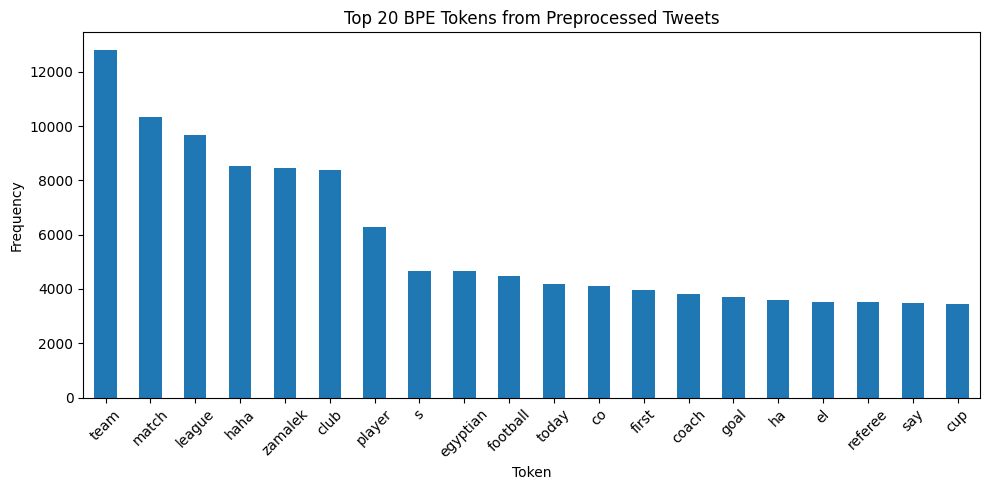

In [9]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    return {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}.get(tag, wordnet.NOUN)

stop_words = set(stopwords.words('english'))
additional_stopwords = {"al", "god", "https", "ahly", "http"}
stop_words = stop_words.union(additional_stopwords)

def preprocess(tweet):
    tweet = tweet.lower()
    words = re.findall(r'\b[a-zA-Z]+\b', tweet)
    lemmatizer = WordNetLemmatizer()
    processed_words = []
    for w in words:
        lemma = lemmatizer.lemmatize(w, get_wordnet_pos(w))
        if lemma not in stop_words:
            processed_words.append(lemma)
    return " ".join(processed_words)

df = pd.read_csv("./assets/combined.csv")
df.dropna(subset=["tweet"], inplace=True)
processed_texts = df["tweet"].apply(preprocess).tolist()

tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()
trainer = trainers.BpeTrainer(vocab_size=3000, special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
tokenizer.train_from_iterator(processed_texts, trainer=trainer)

all_tokens = []
for text in processed_texts:
    encoded = tokenizer.encode(text)
    all_tokens.extend(encoded.tokens)

freqs = pd.Series(all_tokens).value_counts()
top_20 = freqs.head(20)
plt.figure(figsize=(10, 5))
top_20.plot(kind="bar")
plt.title("Top 20 BPE Tokens from Preprocessed Tweets")
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


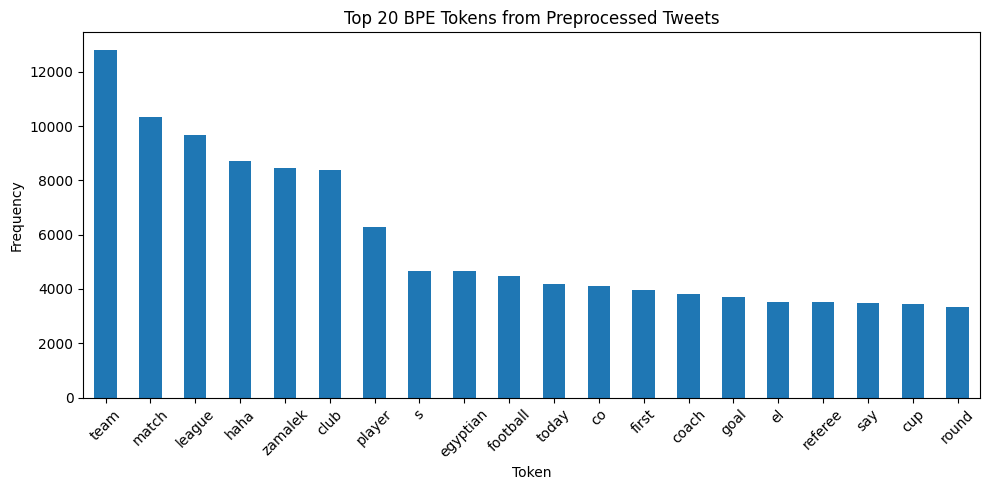

In [10]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    return {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}.get(tag, wordnet.NOUN)

stop_words = set(stopwords.words('english'))
additional_stopwords = {"al", "god", "https", "ahly", "http"}
stop_words = stop_words.union(additional_stopwords)

def custom_preprocess(text):
    text = text.lower()
    text = re.sub(r'\bha\s+ha\b', 'haha', text)
    text = re.sub(r"\b(\w+)'\s*s\b", r"\1's", text)
    return text

def preprocess(tweet):
    tweet = custom_preprocess(tweet)
    words = re.findall(r'\b[a-zA-Z]+\b', tweet)
    lemmatizer = WordNetLemmatizer()
    processed_words = []
    for w in words:
        lemma = lemmatizer.lemmatize(w, get_wordnet_pos(w))
        if lemma not in stop_words:
            processed_words.append(lemma)
    return " ".join(processed_words)

df = pd.read_csv("./assets/combined.csv")
df.dropna(subset=["tweet"], inplace=True)
processed_texts = df["tweet"].apply(preprocess).tolist()

tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))
tokenizer.pre_tokenizer = pre_tokenizers.Whitespace()
trainer = trainers.BpeTrainer(vocab_size=3000, special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
tokenizer.train_from_iterator(processed_texts, trainer=trainer)

all_tokens = []
for text in processed_texts:
    encoded = tokenizer.encode(text)
    all_tokens.extend(encoded.tokens)

freqs = pd.Series(all_tokens).value_counts()
top_20 = freqs.head(20)
plt.figure(figsize=(10, 5))
top_20.plot(kind="bar")
plt.title("Top 20 BPE Tokens from Preprocessed Tweets")
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()